Nulls in column id: 0
Nulls in column cr_prod_cnt_il: 0
Nulls in column amount_rub_clo_prc: 38323
Nulls in column app_registr_rgn_code: 294640
Nulls in column turnover_dynamic_il_1m: 0
Nulls in column cnt_tran_aut_tendency1m: 278078
Nulls in column sum_tran_aut_tendency1m: 278078
Nulls in column amount_rub_sup_prc: 38323
Nulls in column sum_tran_aut_tendency3m: 244138
Nulls in column clnt_trust_relation: 285769
Nulls in column rest_dynamic_fdep_1m: 0
Nulls in column cnt_tran_aut_tendency3m: 244138
Nulls in column app_marital_status: 286956
Nulls in column rest_dynamic_save_3m: 0
Nulls in column cr_prod_cnt_vcu: 0
Nulls in column rest_avg_cur: 0
Nulls in column cnt_tran_med_tendency1m: 286223
Nulls in column app_kind_of_prop_habitation: 295829
Nulls in column clnt_job_position_type: 310409
Nulls in column amount_rub_nas_prc: 38323
Nulls in column clnt_job_position: 144379
Nulls in column app_driving_license: 297933
Nulls in column trans_count_sup_prc: 38323
Nulls in column app_education

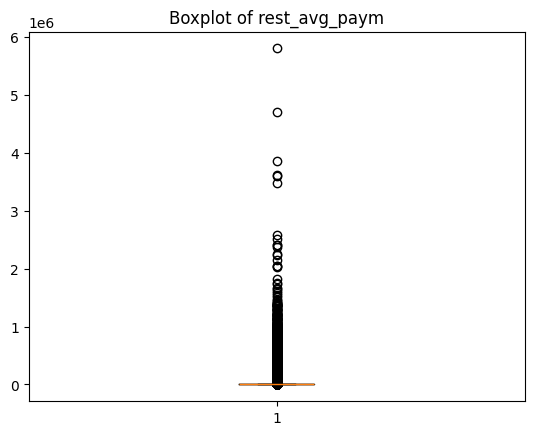

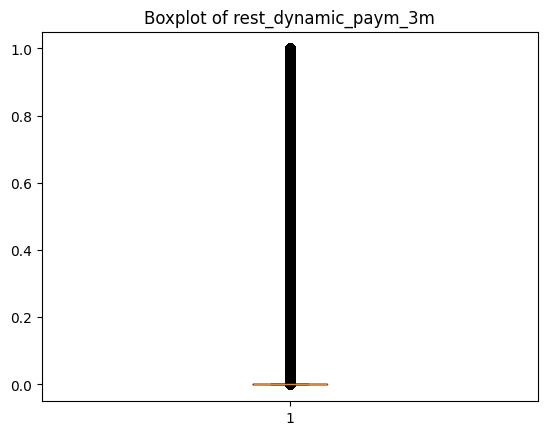

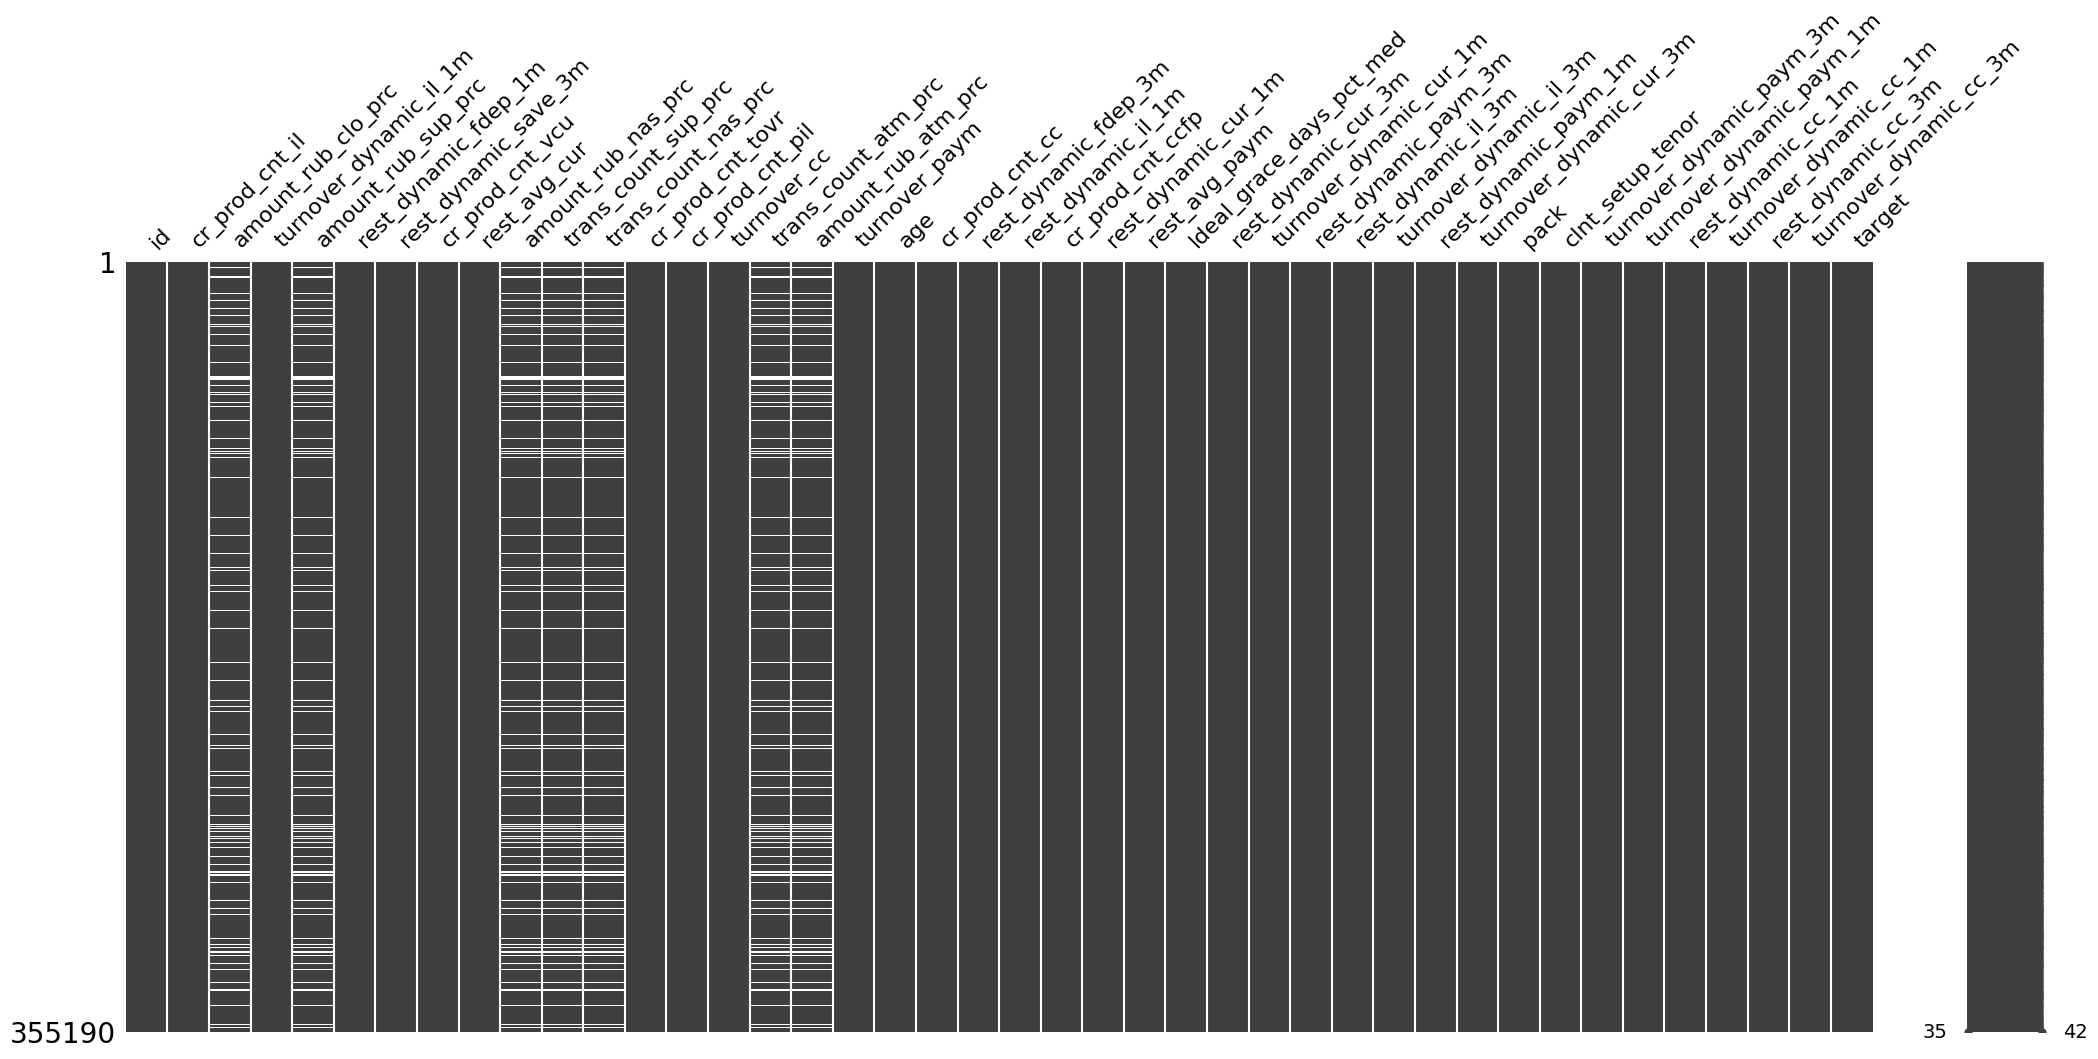

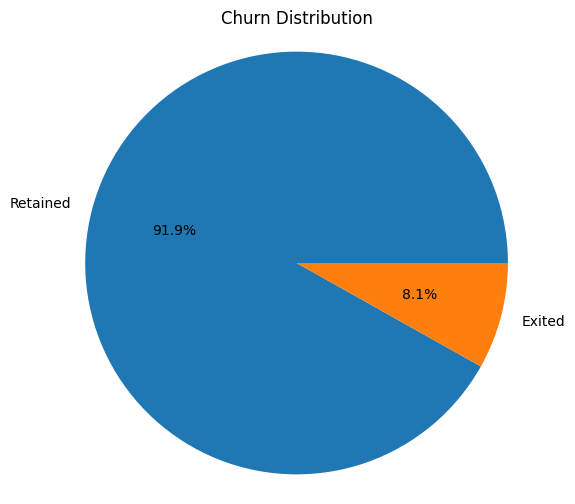

            id  cr_prod_cnt_il  amount_rub_clo_prc  turnover_dynamic_il_1m  \
0       146841               0            0.000000                     0.0   
1       146842               0            0.041033                     0.0   
2       146843               0            0.006915                     0.0   
3       146844               0            0.000000                     0.0   
4       146845               0            0.000000                     0.0   
...        ...             ...                 ...                     ...   
355185  590822               0            0.000000                     0.0   
355186  590823               0            0.000000                     0.0   
355187  590825               0            0.041298                     0.0   
355188  590826               0            0.000000                     0.0   
355189  590828               0            0.000000                     0.0   

        amount_rub_sup_prc  rest_dynamic_fdep_1m  rest_dynamic_

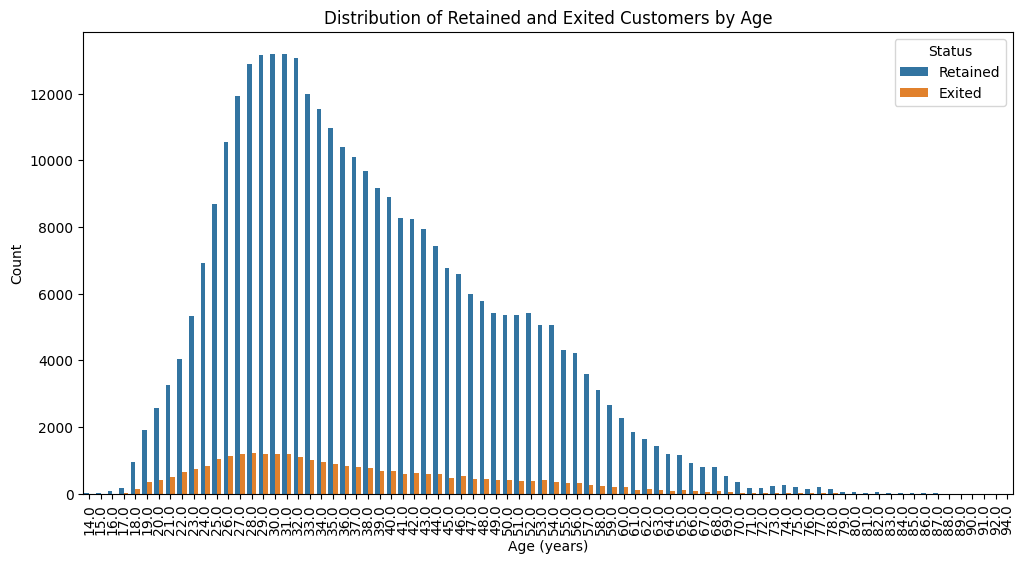

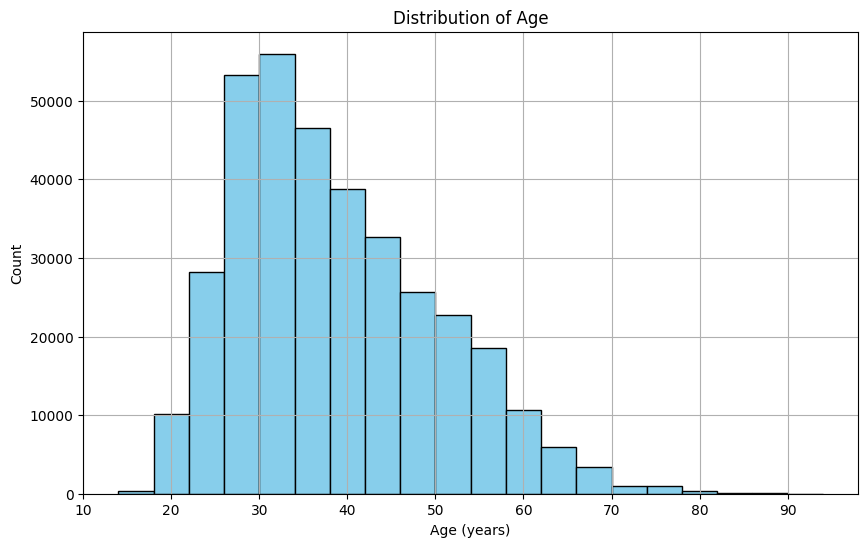

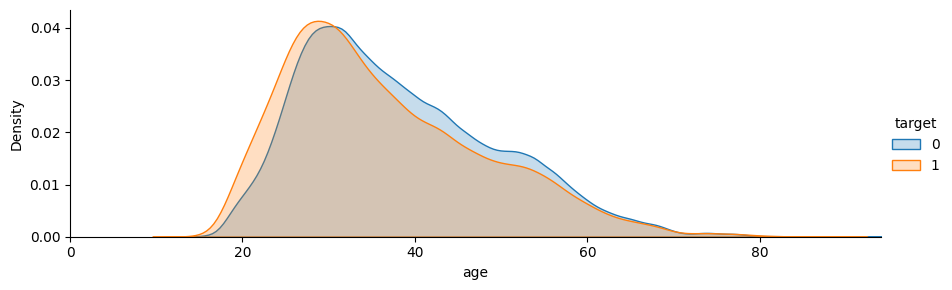

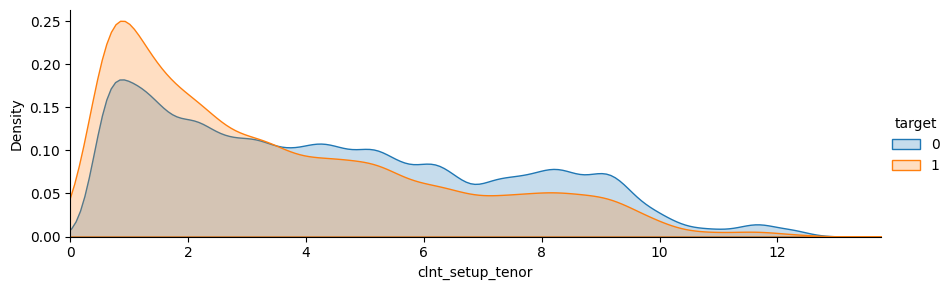

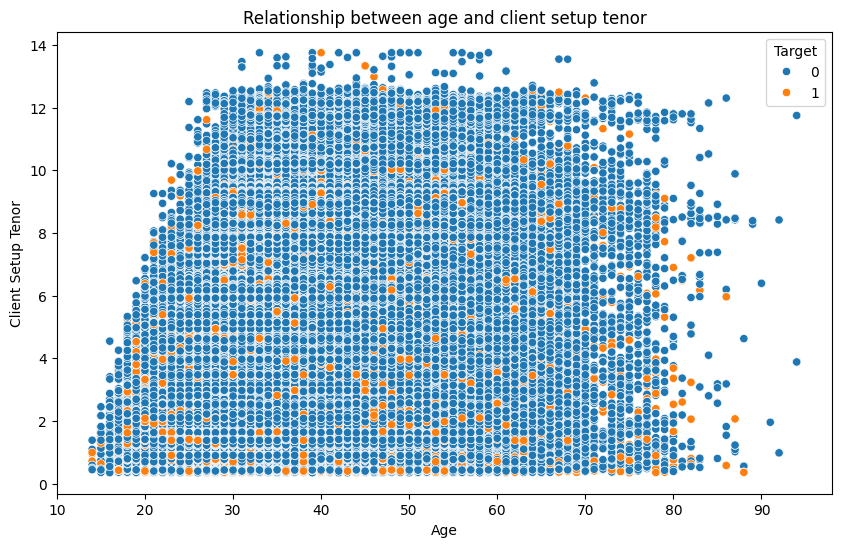

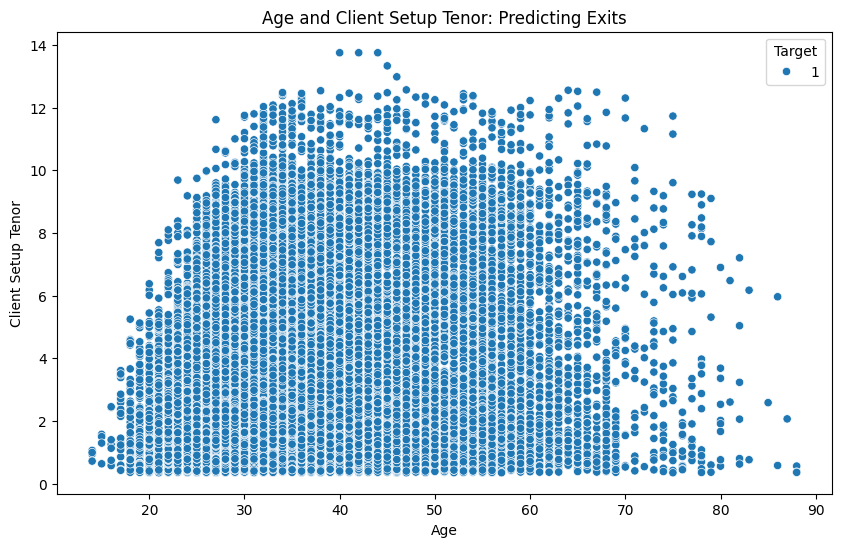

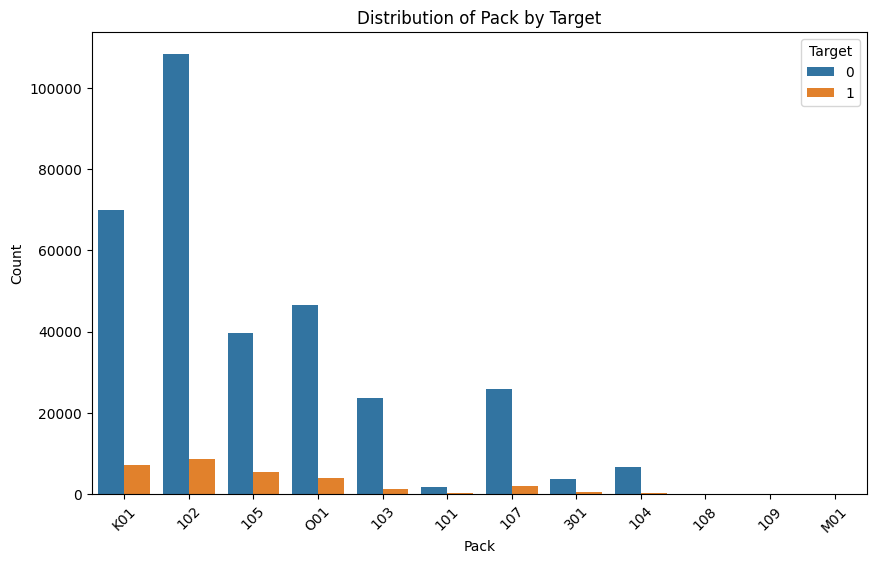

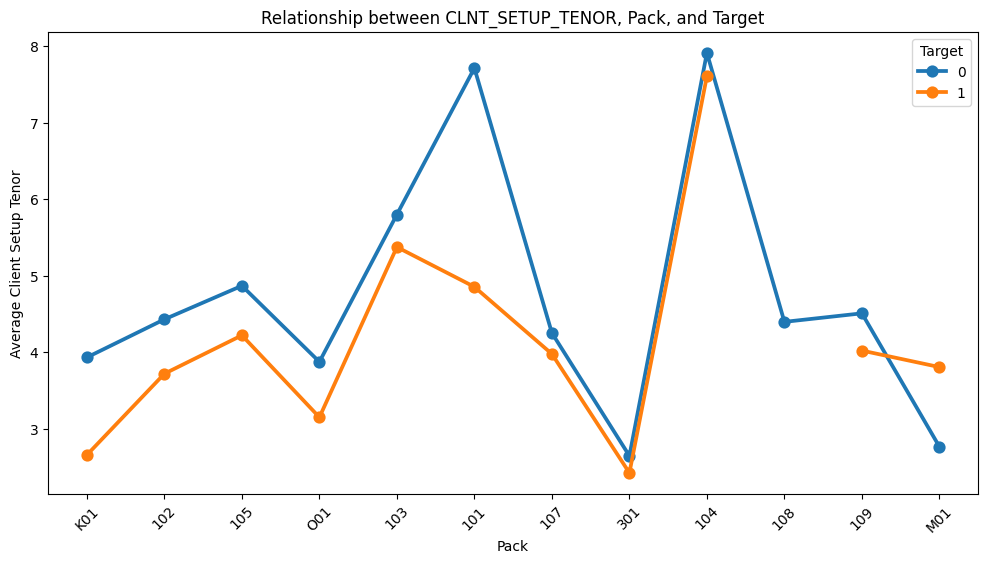

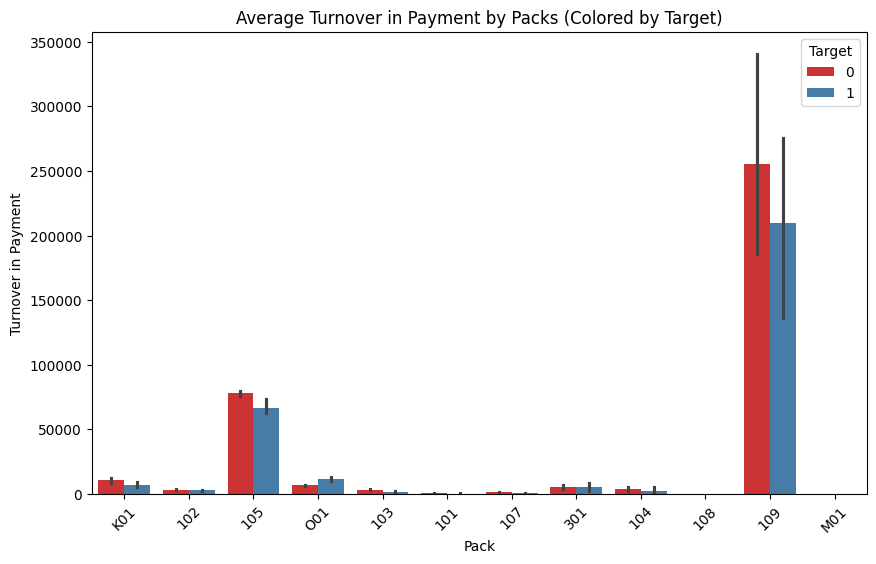

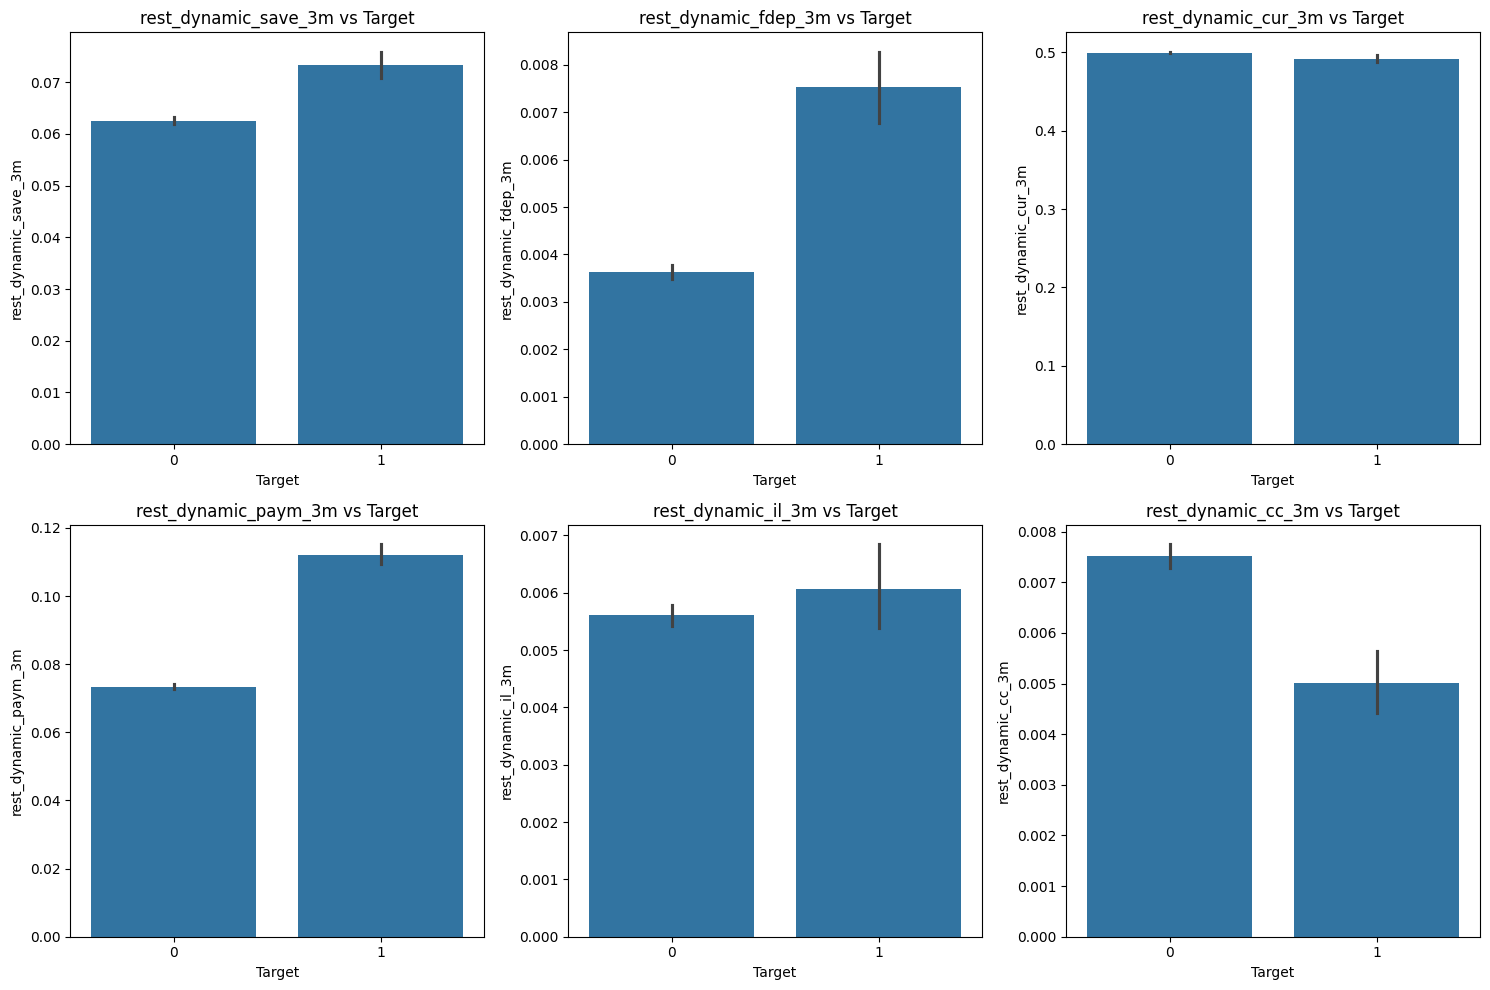

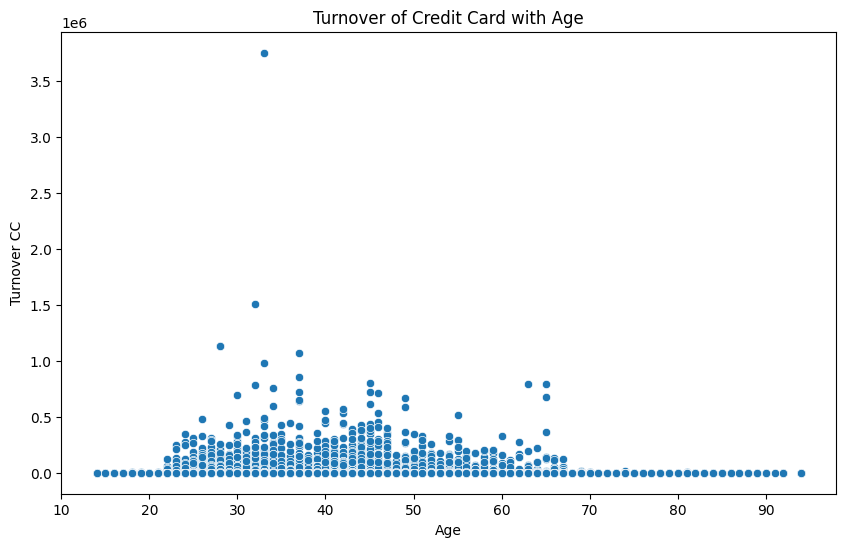

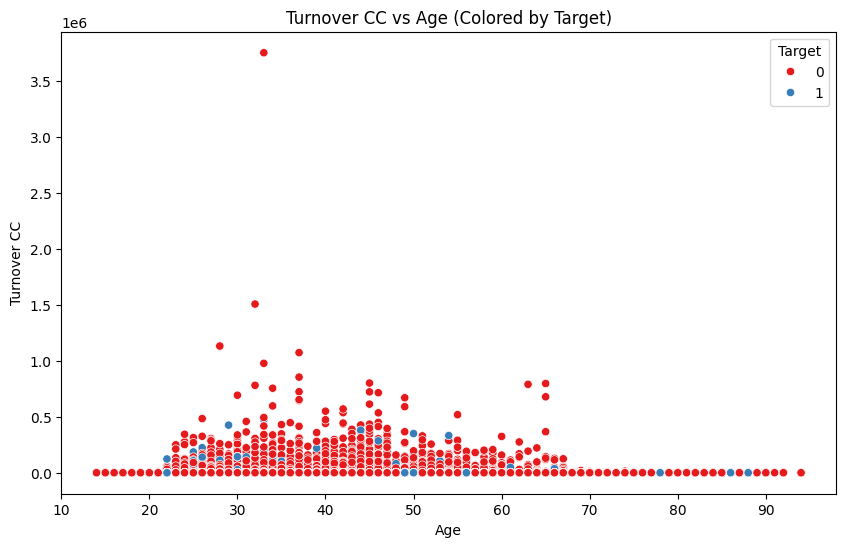

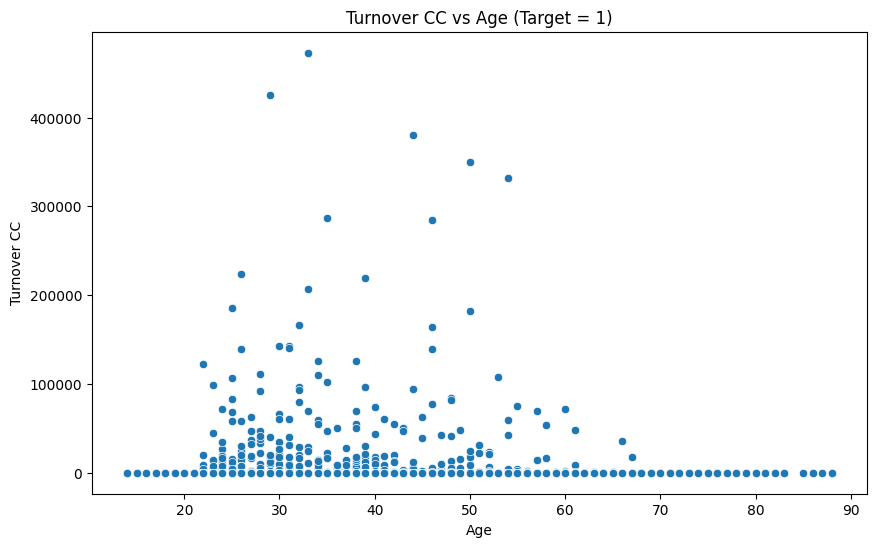

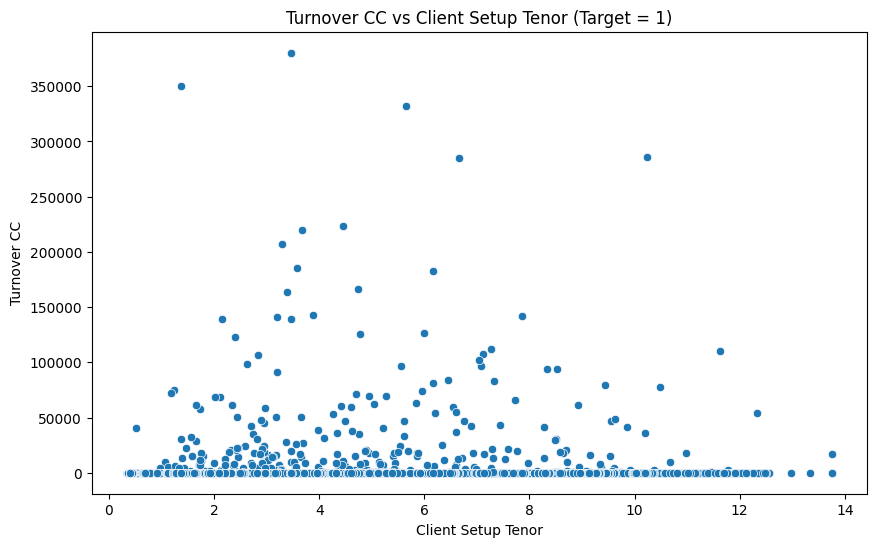

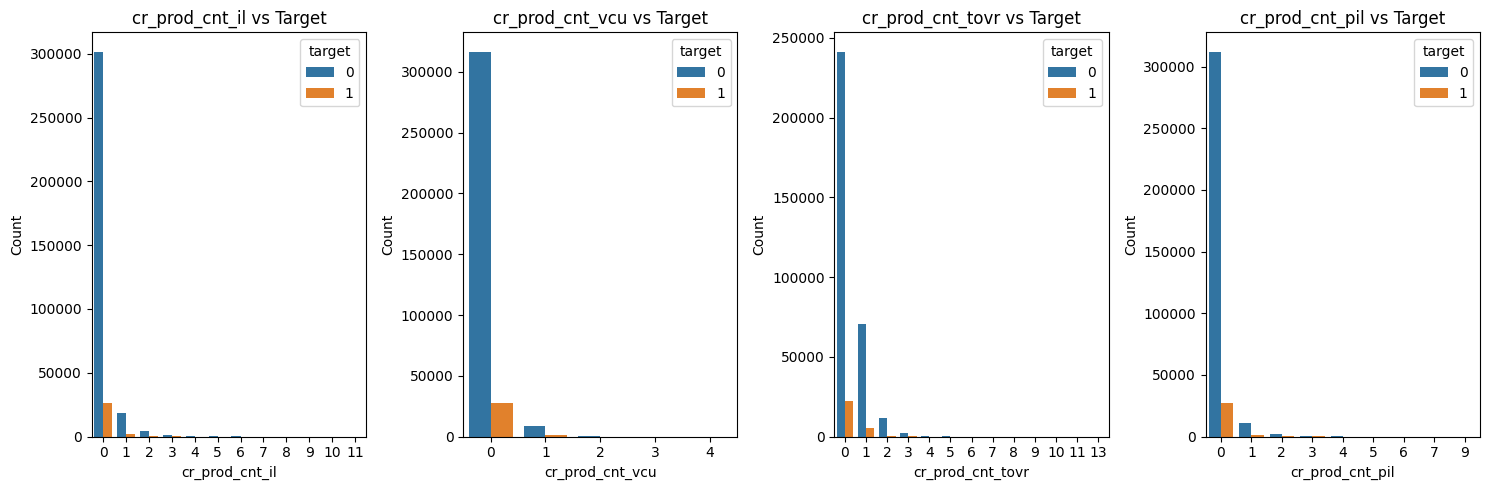

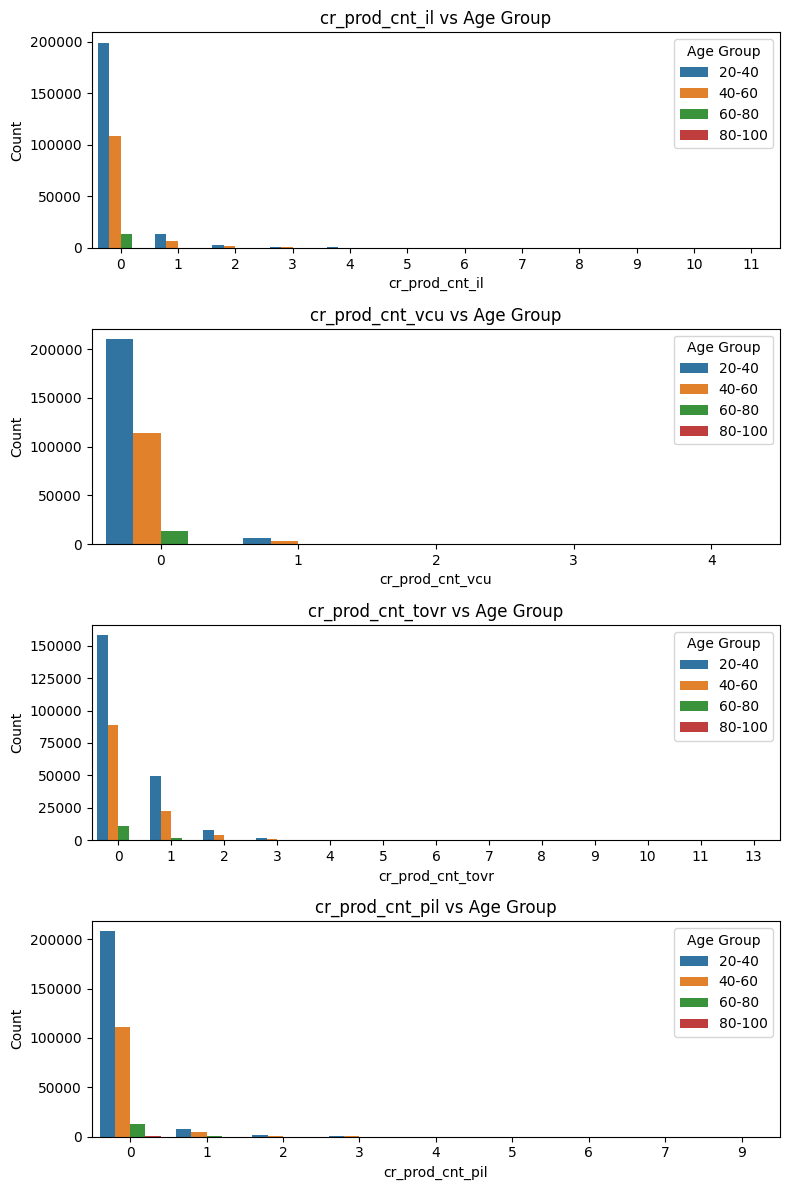

File 'dev/processed/bank_data_visualization.csv' successfully written to bucket 'introtoaiwinter24'.


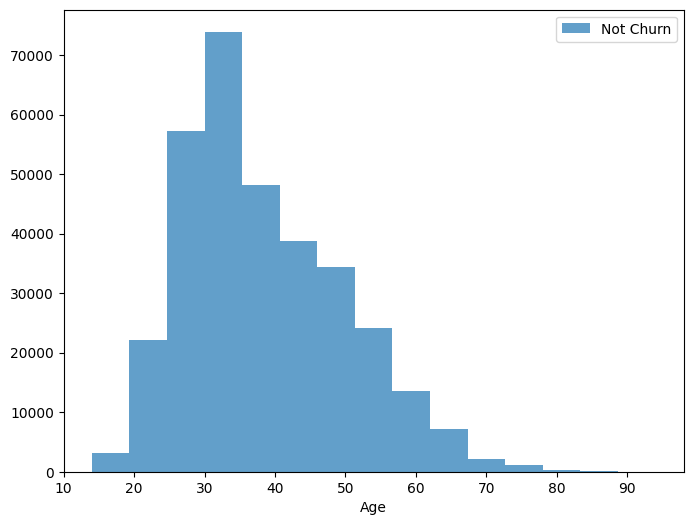

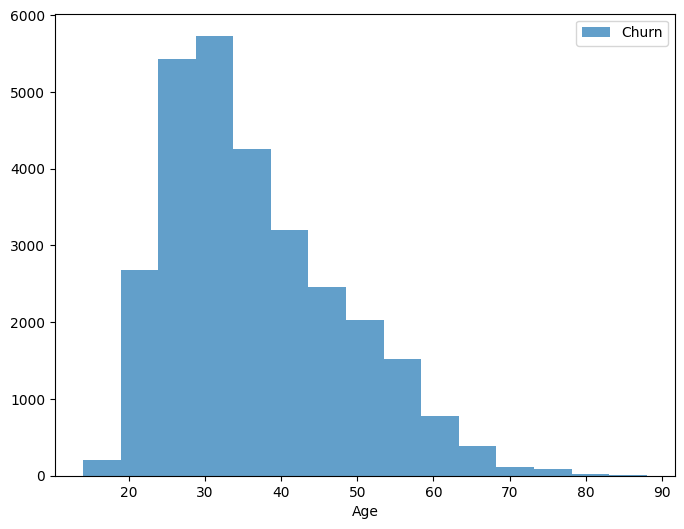

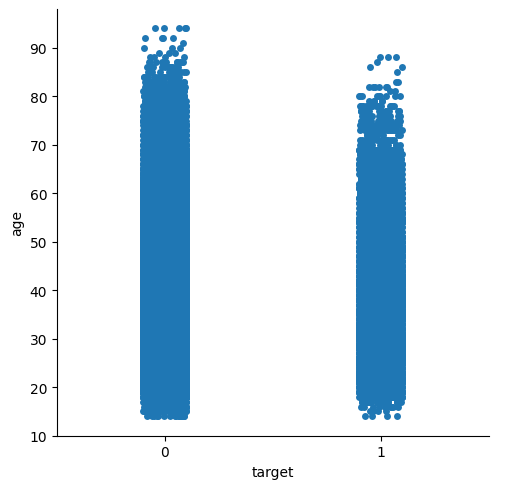

       id  cr_prod_cnt_il  amount_rub_clo_prc  turnover_dynamic_il_1m  \
0  146841               0            0.000000                     0.0   
1  146842               0            0.041033                     0.0   
2  146843               0            0.006915                     0.0   
3  146844               0            0.000000                     0.0   
4  146845               0            0.000000                     0.0   

   amount_rub_sup_prc  rest_dynamic_fdep_1m  rest_dynamic_save_3m  \
0            0.000000                   0.0              0.541683   
1            0.244678                   0.0              0.000000   
2            0.000000                   0.0              0.000000   
3            0.000000                   0.0              0.005874   
4            0.000000                   0.0              0.000000   

   cr_prod_cnt_vcu   rest_avg_cur  amount_rub_nas_prc  trans_count_sup_prc  \
0                0  156067.339800                 0.0             0.

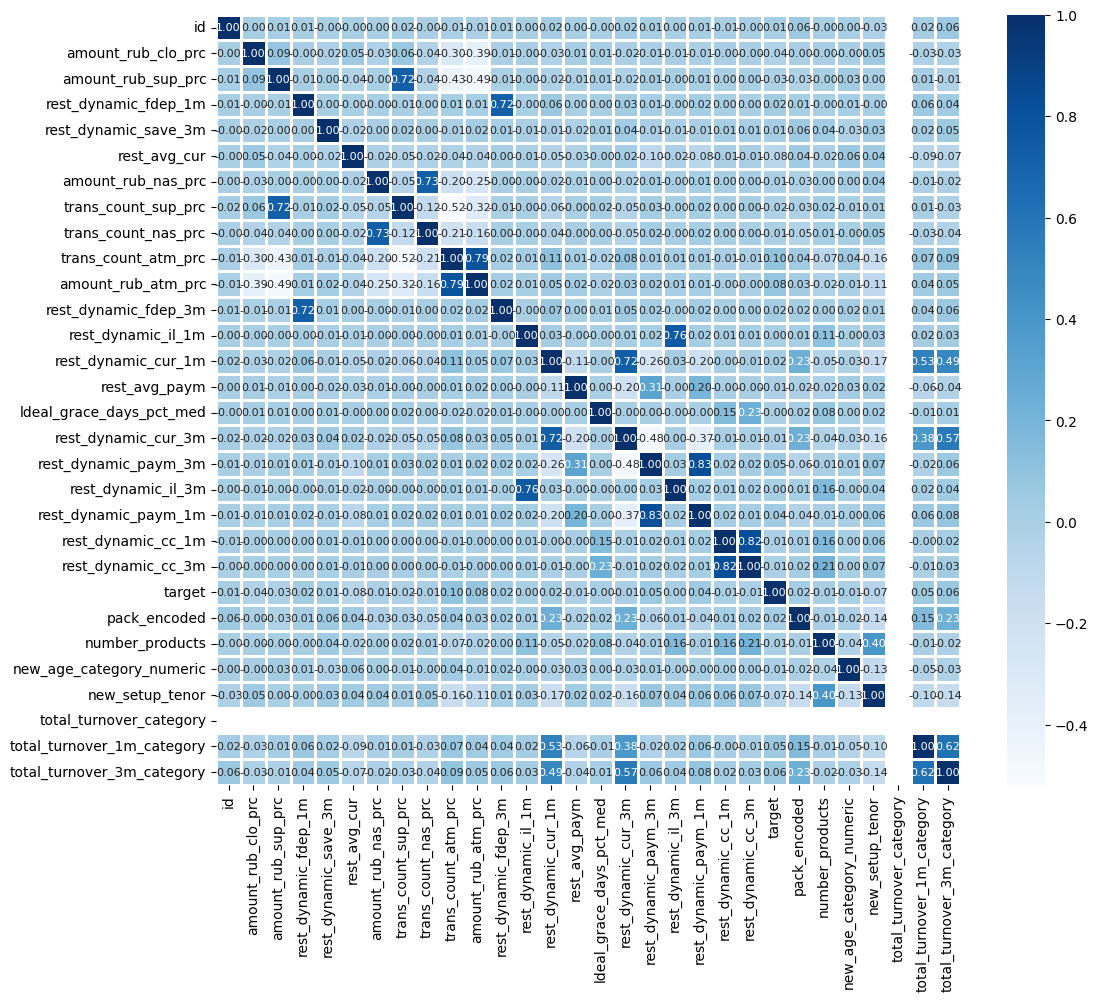

File 'dev/final/bank_data_feature_eng.csv' successfully written to bucket 'introtoaiwinter24'.


In [17]:
%run main.ipynb
%run data_cleaning.ipynb
%run data_visualization.ipynb
%run feature_engineering.ipynb

In [18]:
# Read the CSV From FEATURE ENGINEERING data source file from S3 into a DataFrame
# Use the methods from the S3Utils class
if s3_utils.check_file_exists(output_file_key_data_feature_engineering):
    dataset = s3_utils.read_csv_from_s3(output_file_key_data_feature_engineering)

Model Training Build XGBoost Model and Make Predictions

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Select the features to include just to check the model performance
selected_features = ['id','new_age_category_numeric', 'pack_encoded', 'number_products', 'new_setup_tenor', 'rest_avg_paym', 'rest_dynamic_cur_3m','rest_dynamic_fdep_3m']
['id', 'amount_rub_clo_prc', 'amount_rub_sup_prc', 'rest_dynamic_save_3m', 'rest_avg_cur', 'amount_rub_nas_prc', 'amount_rub_atm_prc', 'rest_dynamic_fdep_3m', 'rest_avg_paym', 'ldeal_grace_days_pct_med', 'rest_dynamic_cur_3m', 'rest_dynamic_paym_3m', 'rest_dynamic_il_3m', 'rest_dynamic_cc_3m', 'target', 'pack_encoded', 'number_products', 'new_age_category_numeric', 'new_setup_tenor', 'total_turnover_category', 'total_turnover_1m_category', 'total_turnover_3m_category']

# Split the dataset into features (X) and target variable (y) using the selected features
X = dataset[selected_features]
X = dataset.drop(columns=['target'])
y = dataset['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
# Create and train the first basic XGBoost model
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [21]:
# Make predictions
y_pred = model.predict(X_test)

In [43]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
roc_value = roc_auc_score(y_test, y_pred)
print(f"ROC Value: {roc_value:.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.92
ROC Value: 0.52
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     97886
           1       0.50      0.04      0.07      8671

    accuracy                           0.92    106557
   macro avg       0.71      0.52      0.51    106557
weighted avg       0.89      0.92      0.88    106557



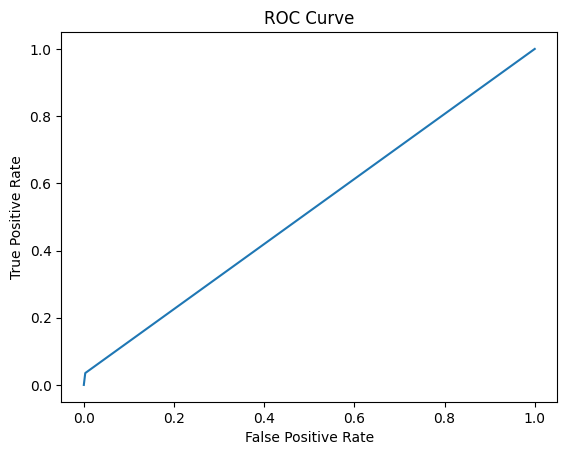

In [44]:
# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Hyperparameter tuning and finding the best parameter

To find the best parameter we will use GridSearchCV and Randomized search CV. The below code is used to train the model and find the best parameters.

In [23]:
PARAMETERS = {"subsample":[0.5, 0.75, 1],
"colsample_bytree":[0.5, 0.75, 1],
"max_depth":[2, 6, 12],
"min_child_weight":[1,5,15],
"learning_rate":[0.3, 0.1, 0.03],
"n_estimators":[100]}

In [24]:
model = XGBClassifier(n_estimators=100, n_jobs=-1, eval_metric='error')

Initialise Grid Search Model to inherit from the XGBoost Model, set the of cross validations to 3 per combination and use accuracy to score the models.

In [25]:
model_gs = GridSearchCV(model,param_grid=PARAMETERS,cv=3,scoring="accuracy")

In [26]:
model_gs.fit(X_train,y_train)
print(model_gs.best_params_)

{'colsample_bytree': 0.75, 'learning_rate': 0.03, 'max_depth': 12, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.5}


In [27]:
# Initialise model using best parameters

model = XGBClassifier(objective="binary:logistic",subsample=1,
colsample_bytree=0.5,
min_child_weight=1,
max_depth=12,
learning_rate=0.1,
n_estimators=100)

# Fit the model but stop early if there has been no reduction in error after 10 epochs.
model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)])

/home/codespace/.python/current/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.30182
[1]	validation_0-logloss:0.29600
[2]	validation_0-logloss:0.29096
[3]	validation_0-logloss:0.28663
[4]	validation_0-logloss:0.28246
[5]	validation_0-logloss:0.27665
[6]	validation_0-logloss:0.27178
[7]	validation_0-logloss:0.26966
[8]	validation_0-logloss:0.26591
[9]	validation_0-logloss:0.26366
[10]	validation_0-logloss:0.26209
[11]	validation_0-logloss:0.26066
[12]	validation_0-logloss:0.25734
[13]	validation_0-logloss:0.25607
[14]	validation_0-logloss:0.25498
[15]	validation_0-logloss:0.25212
[16]	validation_0-logloss:0.25009
[17]	validation_0-logloss:0.24842
[18]	validation_0-logloss:0.24680
[19]	validation_0-logloss:0.24525
[20]	validation_0-logloss:0.24459
[21]	validation_0-logloss:0.24432
[22]	validation_0-logloss:0.24378
[23]	validation_0-logloss:0.24283
[24]	validation_0-logloss:0.24239
[25]	validation_0-logloss:0.24152
[26]	validation_0-logloss:0.24124
[27]	validation_0-logloss:0.24061
[28]	validation_0-logloss:0.24035
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [28]:
def model_eval(y_true, y_pred):
    train_predictions = model.predict(X_train)
    model_eval(y_train, train_predictions)
    pass


In [29]:
# pass the parameters and add the regularization parameter.

params = {'max_depth': [3, 6, 10, 15],
          'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4],
          'subsample': np.arange(0.5, 1.0, 0.1),
          'colsample_bytree': np.arange(0.5, 1.0, 0.1),
          'colsample_bylevel': np.arange(0.5, 1.0, 0.1),
          'n_estimators': [100, 250, 500, 750],
          'reg_alpha' : [0.1,0.001,.00001],
          'reg_lambda': [0.1,0.001,.00001]}


In [30]:
from sklearn.model_selection import RandomizedSearchCV
# Instantiate the model, with 100 estimators.

xgbclf = XGBClassifier(n_estimators=100, n_jobs=-1)

In [31]:
from sklearn.model_selection import RandomizedSearchCV

# Use RandomizedCV to find the best parameter

clf = RandomizedSearchCV(estimator=xgbclf,
                             param_distributions=params,
                             scoring='accuracy',
                             n_iter=25,
                             n_jobs=4,
                             verbose=1)

In [32]:
# Fit the model, find the best parameter and use it to predict the target variable.

clf.fit(X_train,y_train)
print("Best hyperparameter combination: ", clf.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


/home/codespace/.local/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best hyperparameter combination:  {'subsample': 0.7, 'reg_lambda': 0.001, 'reg_alpha': 0.1, 'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.01, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.7}


Repeat the process to train and test the model.

In [33]:
#Initialise model using best parameters from randomized cv
model_new_hyper = XGBClassifier(
                                subsample=0.89,
reg_alpha=0.1,  # L1 regularization (Lasso)
reg_lambda=0.1,  # L2 regularization (Ridge)
colsample_bytree=0.6,
colsample_bylevel=.8,
min_child_weight=1,
max_depth=3,
learning_rate=0.2,
n_estimators=500)
#Fit the model but stop early if there has been no reduction in error after 10 epochs.
model_new_hyper.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)])

/home/codespace/.python/current/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.29780
[1]	validation_0-logloss:0.28713


[2]	validation_0-logloss:0.27943
[3]	validation_0-logloss:0.27296
[4]	validation_0-logloss:0.26815
[5]	validation_0-logloss:0.26552
[6]	validation_0-logloss:0.26311
[7]	validation_0-logloss:0.25951
[8]	validation_0-logloss:0.25734
[9]	validation_0-logloss:0.25571
[10]	validation_0-logloss:0.25483
[11]	validation_0-logloss:0.25416
[12]	validation_0-logloss:0.25318
[13]	validation_0-logloss:0.25205
[14]	validation_0-logloss:0.25170
[15]	validation_0-logloss:0.25018
[16]	validation_0-logloss:0.24916
[17]	validation_0-logloss:0.24827
[18]	validation_0-logloss:0.24764
[19]	validation_0-logloss:0.24710
[20]	validation_0-logloss:0.24651
[21]	validation_0-logloss:0.24623
[22]	validation_0-logloss:0.24585
[23]	validation_0-logloss:0.24554
[24]	validation_0-logloss:0.24509
[25]	validation_0-logloss:0.24475
[26]	validation_0-logloss:0.24443
[27]	validation_0-logloss:0.24403
[28]	validation_0-logloss:0.24371
[29]	validation_0-logloss:0.24342
[30]	validation_0-logloss:0.24328
[31]	validation_0-logl

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.8, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Feature Importance use SHAP

SHAP Explainer

In [34]:
# Instantiate the model with 100 estimators and utilizing all available cores.
xgbclf = XGBClassifier(n_estimators=100, n_jobs=-1)

# Define the hyperparameter grid
param_dist = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'min_child_weight': [1, 2, 3, 4, 5]
}

# Instantiate the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=xgbclf,
                                   param_distributions=param_dist,
                                   n_iter=10,
                                   scoring='accuracy',
                                   cv=5,
                                   verbose=1,
                                   random_state=42,
                                   n_jobs=-1)

# Fit the RandomizedSearchCV object to your data
random_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'subsample': 0.6, 'min_child_weight': 4, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.7}
Best Score: 0.9188120654439086


In [35]:
model.save_model('model_file.model')

/home/codespace/.python/current/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [13:55:34] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


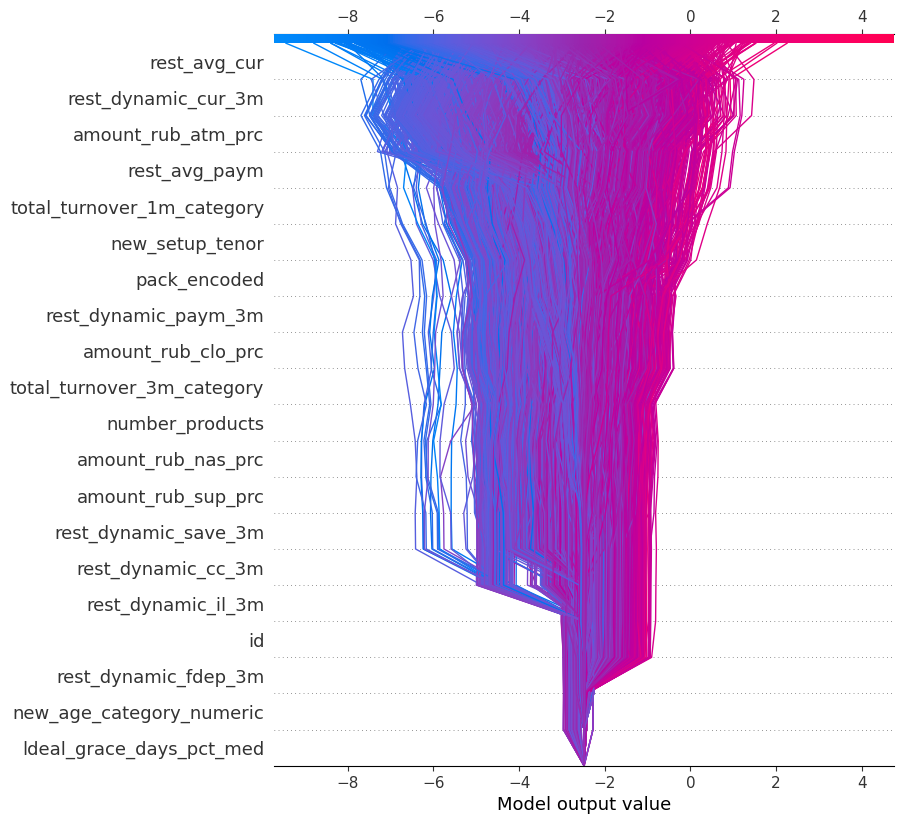

In [38]:
import shap
# Define the explainer object
explainer = shap.Explainer(model_new_hyper)

# Calculate the SHAP values
shap_values = explainer.shap_values(X_test)

# Check the decision plot using the SHAP values and the expected value.
expected_value = explainer.expected_value
shap.decision_plot(expected_value, shap_values, X_test, ignore_warnings=True)


Saving and Loading XGBoost Models

In [39]:
model_new_hyper.save_model('model_new_hyper.model')
print("XGBoost model saved successfully.")

# Load the saved XGBoost model
import xgboost as xgb
loaded_model = xgb.Booster()
loaded_model.load_model('model_new_hyper.model')

XGBoost model saved successfully.


/home/codespace/.python/current/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [13:58:21] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


'loaded_model' contains the trained XGBoost model, and can be used for predictions.